## Capstone Project 1

### Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv("ford_car_price_prediction.csv")
data.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,145,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,145,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0


In [2]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2016.993836,12280.198630,21907.027397,108.205479,58.609726,1.361438
std,1.632212,4447.710936,15874.464065,62.334075,9.577440,0.436243
min,2013.000000,3691.000000,5.000000,0.000000,20.900000,1.000000
25%,2016.000000,9000.000000,10174.000000,30.000000,54.300000,1.000000
50%,2017.000000,11199.000000,17863.500000,145.000000,58.900000,1.200000
75%,2018.000000,14998.000000,29859.750000,145.000000,65.700000,1.500000
max,2020.000000,42489.000000,88927.000000,570.000000,88.300000,5.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1460 non-null   object 
 1   year          1460 non-null   int64  
 2   price         1460 non-null   int64  
 3   transmission  1460 non-null   object 
 4   mileage       1460 non-null   int64  
 5   fuelType      1460 non-null   object 
 6   tax           1460 non-null   int64  
 7   mpg           1460 non-null   float64
 8   engineSize    1460 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 102.8+ KB


In [4]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
print("Dataset dimensions:", data.shape)

Dataset dimensions: (1460, 9)


In [6]:
target_label = 'price'
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fueltype', 'tax',
       'mpg', 'enginesize'],
      dtype='object')

In [7]:
categorical_cols = ['model', 'transmission', 'fueltype']
numerical_cols = ['year', 'mileage', 'tax', 'mpg', 'enginesize']
y = data[[target_label]]

### 2. Exploratory Data Analysis (EDA)

### 2.1 Histograma e Distribuição de Preços dos Carros

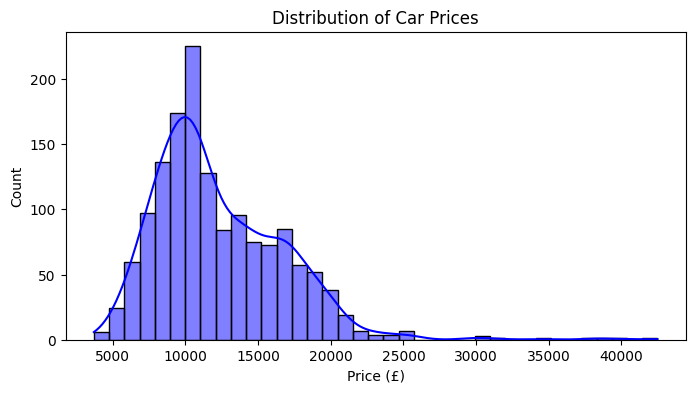

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(data[target_label], kde=True, color='blue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()

### Valores Únicos e Contagens das Variáveis Categóricas

In [32]:
for col in categorical_cols:
    print(f"{col} unique values and counts:")
    print(data[col].value_counts())
    print()

model unique values and counts:
model
Fiesta                   497
Focus                    413
Kuga                     198
EcoSport                  94
C-MAX                     57
Ka+                       53
Mondeo                    26
B-MAX                     25
Grand C-MAX               19
S-MAX                     13
Edge                      11
Tourneo Custom            11
Grand Tourneo Connect      8
KA                         8
Puma                       7
Galaxy                     7
Mustang                    7
Tourneo Connect            6
Name: count, dtype: int64

transmission unique values and counts:
transmission
Manual       1313
Semi-Auto      78
Automatic      69
Name: count, dtype: int64

fueltype unique values and counts:
fueltype
Petrol    944
Diesel    515
Hybrid      1
Name: count, dtype: int64



### 2.0 Análise da Distribuição de Categorias e seu Impacto no Preço

In [10]:
def plotCategoryDistribution(df, column_name, title):
    col_counts = df[column_name].value_counts().reset_index()
    col_counts.columns = [column_name, 'count']

    plt.figure(figsize=(8, 8))
    explode = [0.01] * len(col_counts)
    plt.pie(col_counts['count'], labels=col_counts[column_name], autopct='%1.1f%%', explode=explode)
    plt.title(f"{title} Distribution")
    plt.show()

def plotImpactOnPrice(df, column_name, title, target_label='price'):
    col_price = df.groupby(column_name)[target_label].mean().reset_index().sort_values(by=target_label)
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=column_name, y=target_label, data=col_price, marker='o')
    plt.title(f"Impact of '{title}' on {target_label.capitalize()}")
    plt.xlabel(title)
    plt.ylabel(f"Average {target_label.capitalize()}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

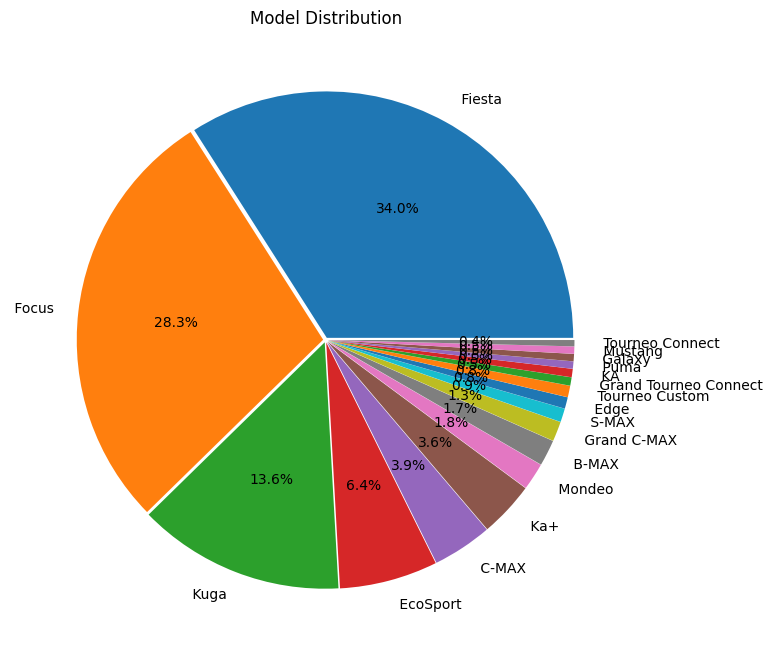

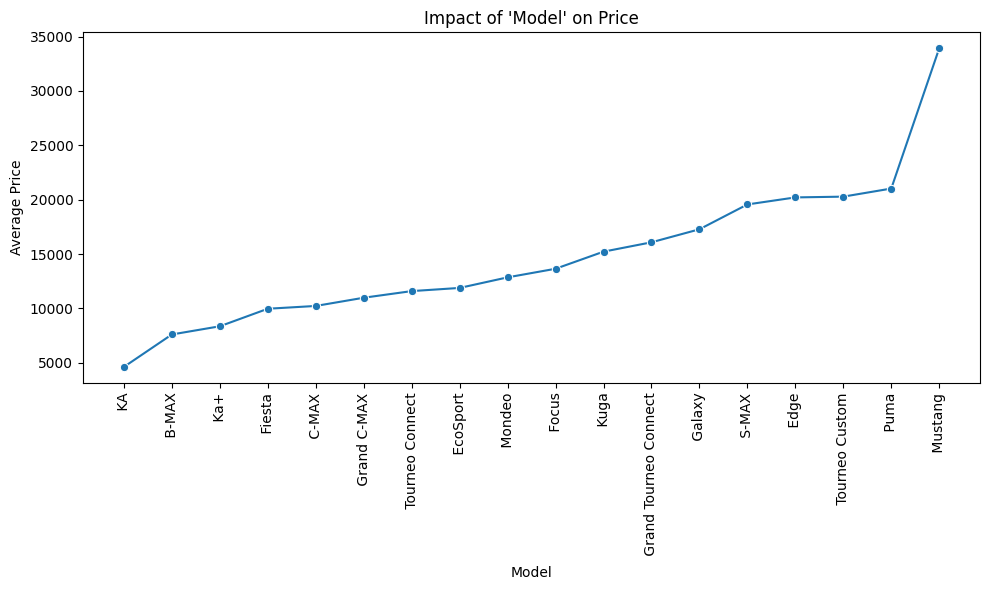

In [11]:
plotCategoryDistribution(data, 'model', 'Model')
plotImpactOnPrice(data, 'model', 'Model')

### 2.1 Relação entre preço e variáveis categóricas usando violinplot

/tmp/ipykernel_680/1804504964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='transmission', y='price', data=data, palette='pastel')


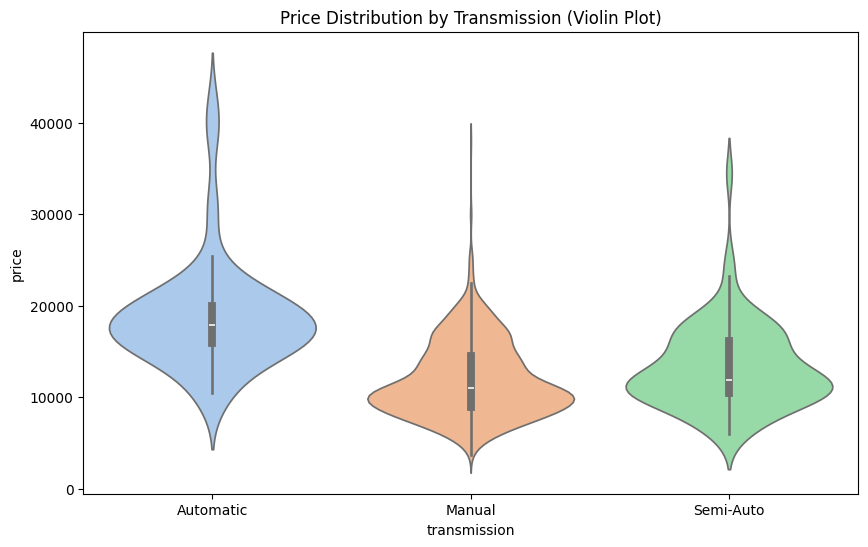

In [12]:
plt.figure(figsize=(10,6))
sns.violinplot(x='transmission', y='price', data=data, palette='pastel')
plt.title("Price Distribution by Transmission (Violin Plot)")
plt.show()

/tmp/ipykernel_680/2768040017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fueltype', y='price', data=data, palette='pastel')


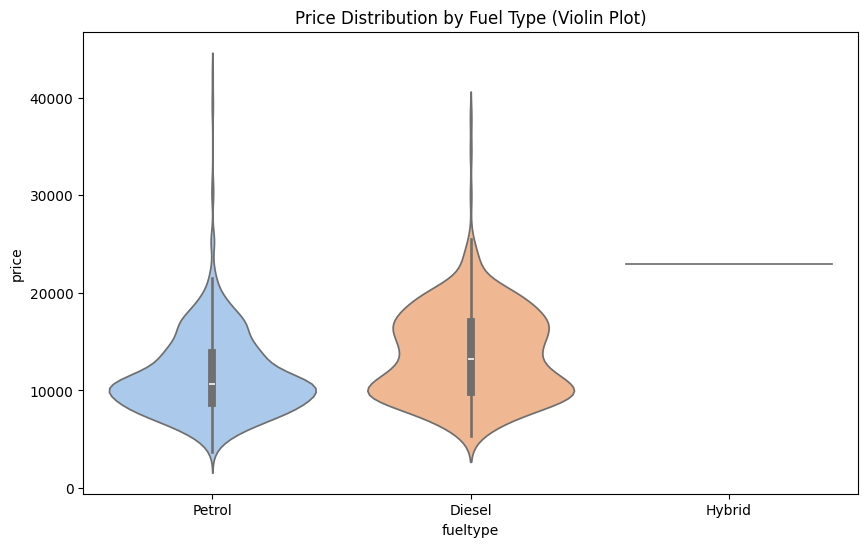

In [13]:
plt.figure(figsize=(10,6))
sns.violinplot(x='fueltype', y='price', data=data, palette='pastel')
plt.title("Price Distribution by Fuel Type (Violin Plot)")
plt.show()

### 2.2 Relação entre variáveis numéricas com hue categórico

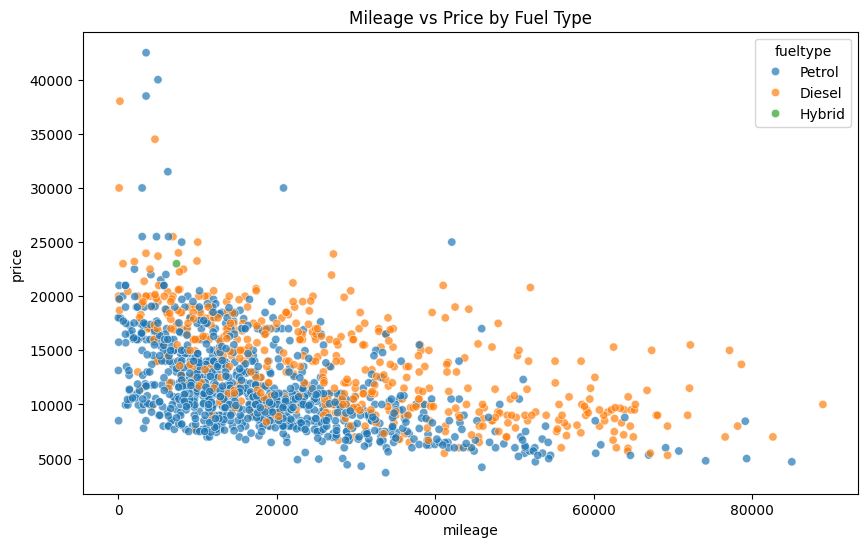

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='mileage', y='price', hue='fueltype', data=data, alpha=0.7)
plt.title("Mileage vs Price by Fuel Type")
plt.show()

### 2.3 Pairplot para ver relações entre variáveis numéricas

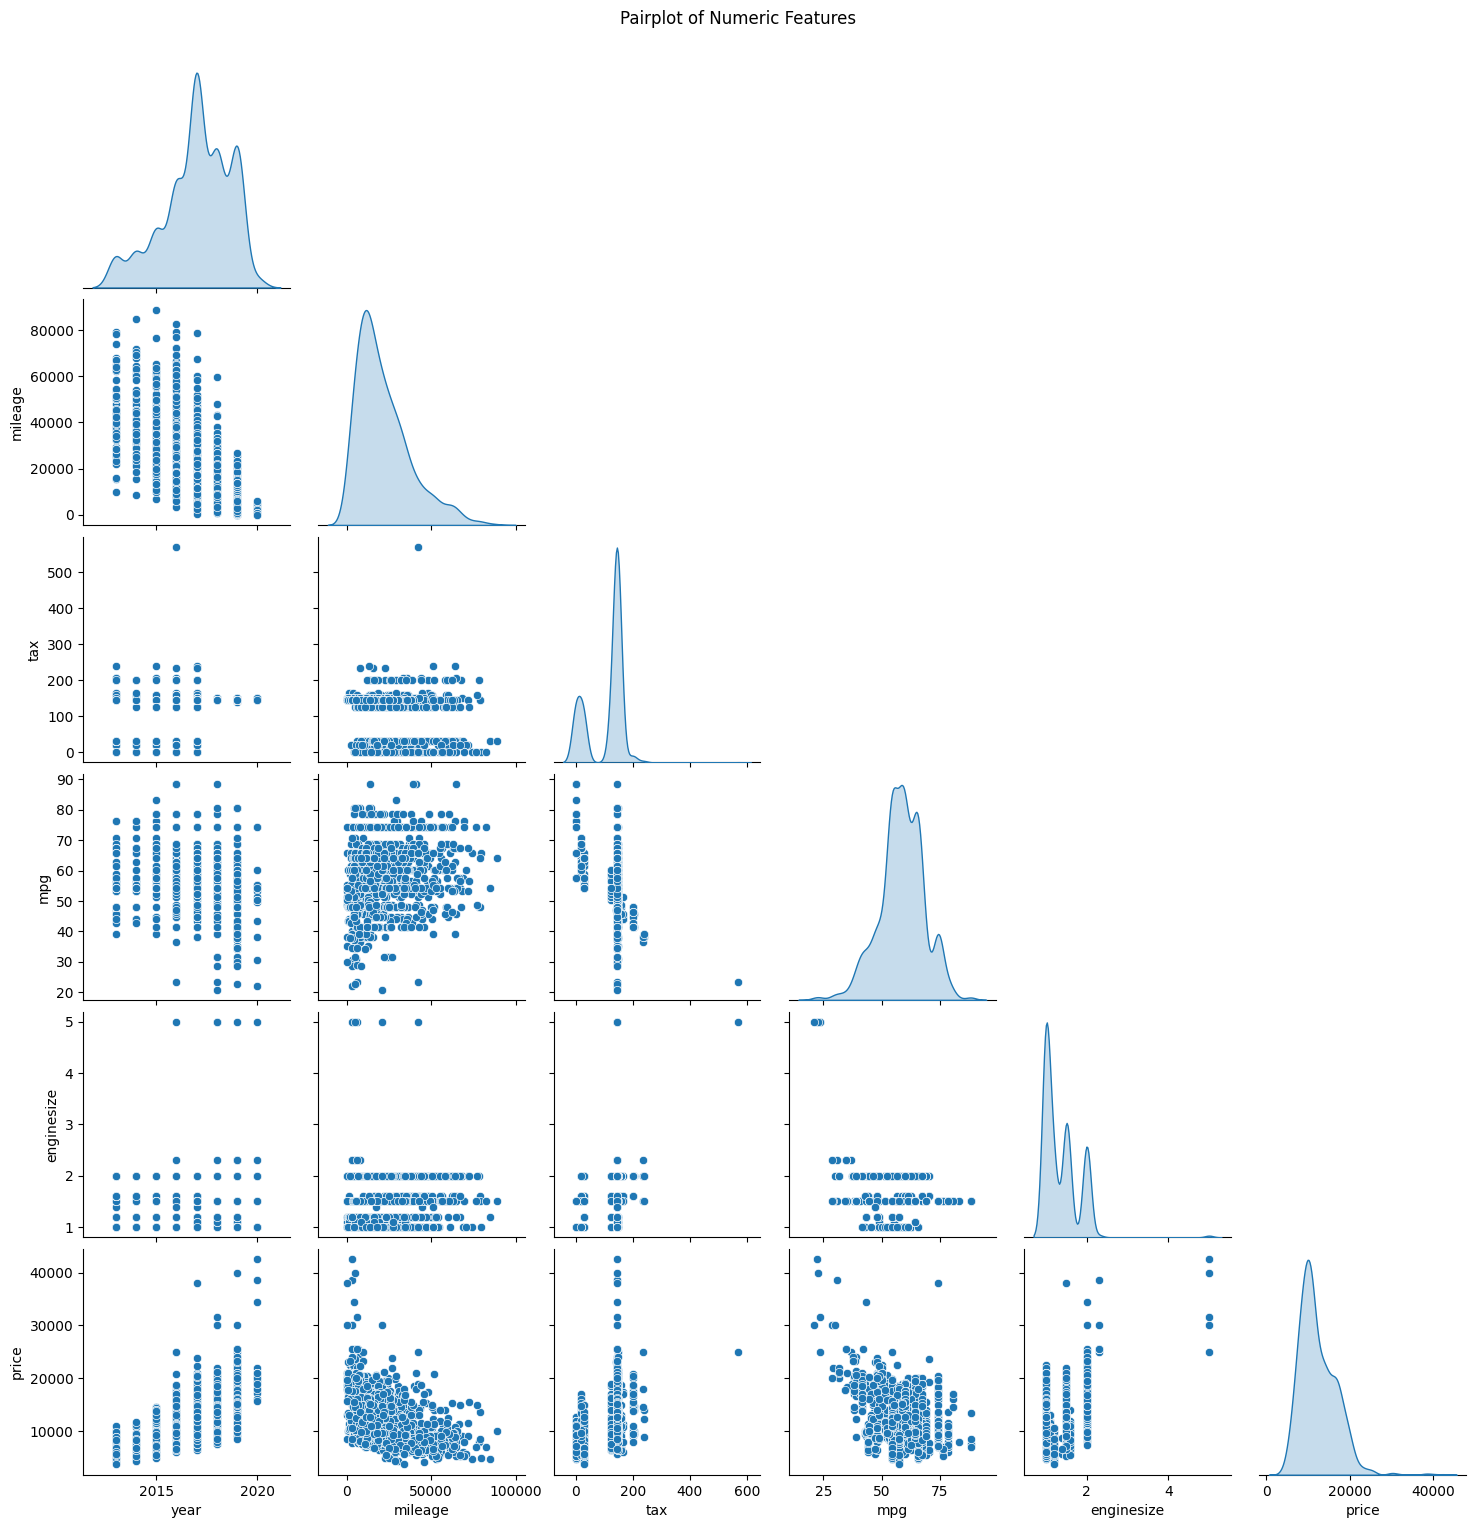

In [15]:
sns.pairplot(data, vars=['year','mileage','tax','mpg','enginesize','price'], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

### 2.4. Boxplot segmentando por ano (ou outra variável numérica tratada como categórica)

/tmp/ipykernel_680/310526202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='price', data=data, palette='Set3')


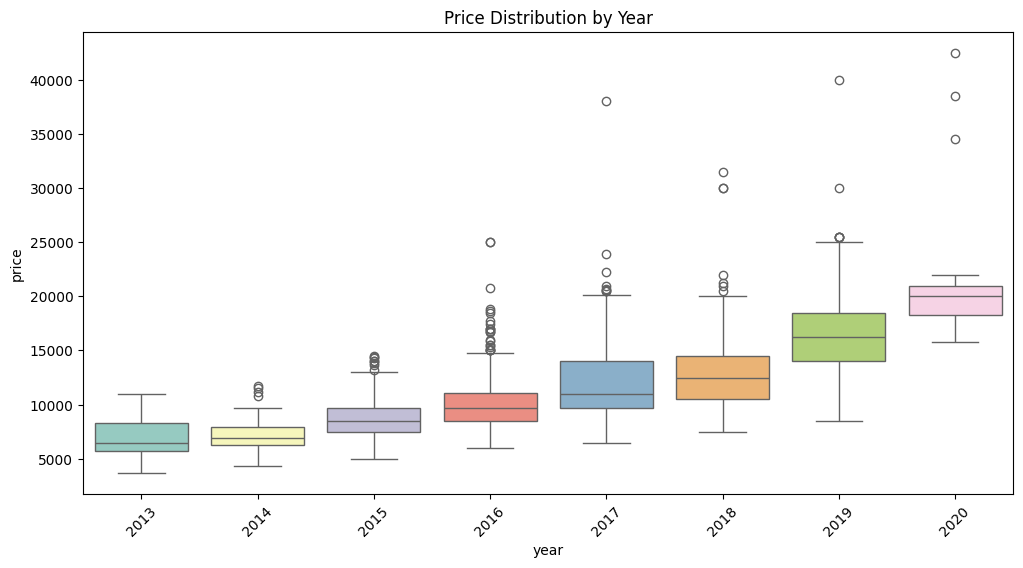

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x='year', y='price', data=data, palette='Set3')
plt.title("Price Distribution by Year")
plt.xticks(rotation=45)
plt.show()

### 2.5 Histograma com múltiplos facets para comparar distribuições

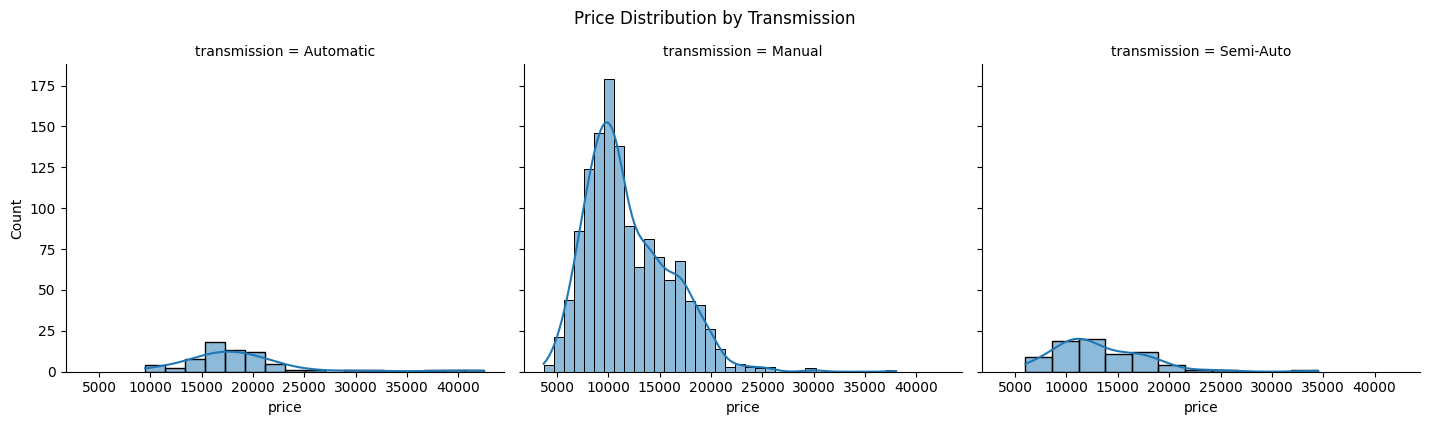

In [17]:
g = sns.FacetGrid(data, col='transmission', height=4, aspect=1.2)
g.map(sns.histplot, 'price', kde=True)
g.fig.suptitle("Price Distribution by Transmission", y=1.05)
plt.show()

### 2.6 Relação entre MPG (eficiência) e preço, destacando transmissão

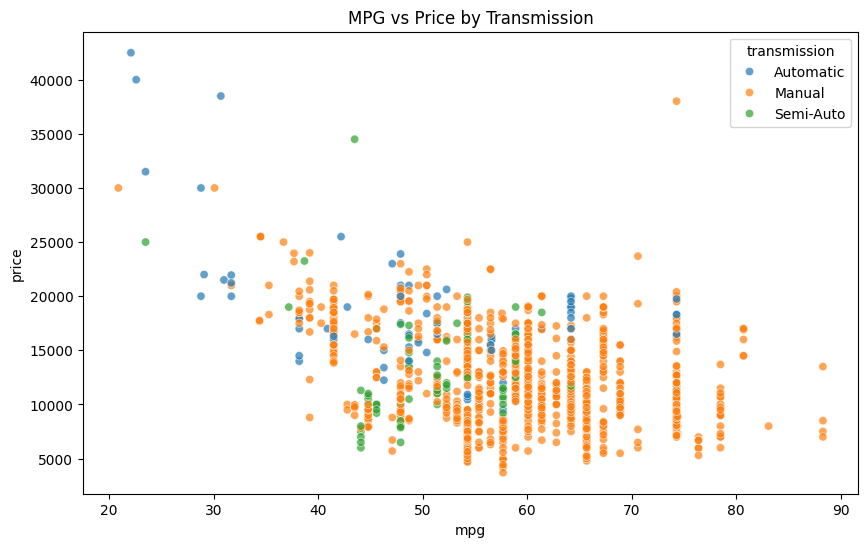

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='mpg', y='price', hue='transmission', data=data, alpha=0.7)
plt.title("MPG vs Price by Transmission")
plt.show()

### 2.7 Relação entre Engine Size e Price destacando Fuel Type

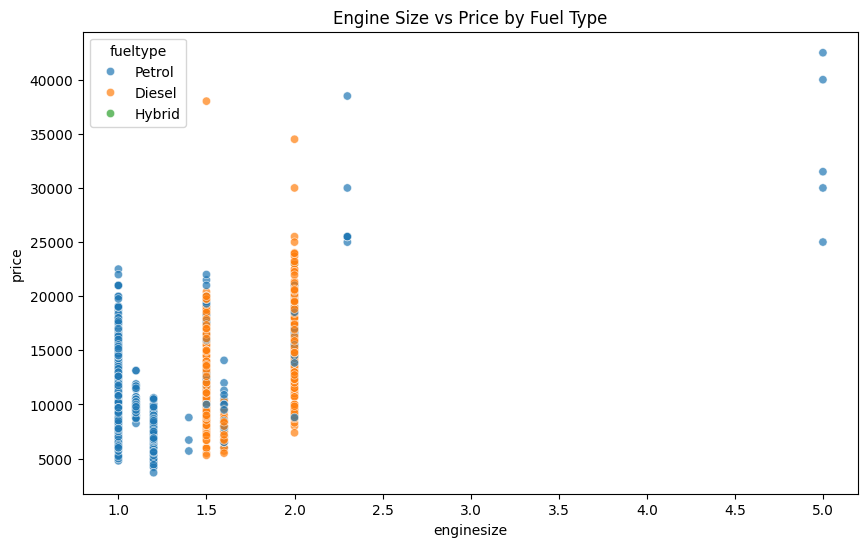

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='enginesize', y='price', hue='fueltype', data=data, alpha=0.7)
plt.title("Engine Size vs Price by Fuel Type")
plt.show()

### 2.8 Comparação de distribuições (KDE)

/tmp/ipykernel_680/4094883156.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['price'], label=trans, shade=True)
/tmp/ipykernel_680/4094883156.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['price'], label=trans, shade=True)
/tmp/ipykernel_680/4094883156.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['price'], label=trans, shade=True)


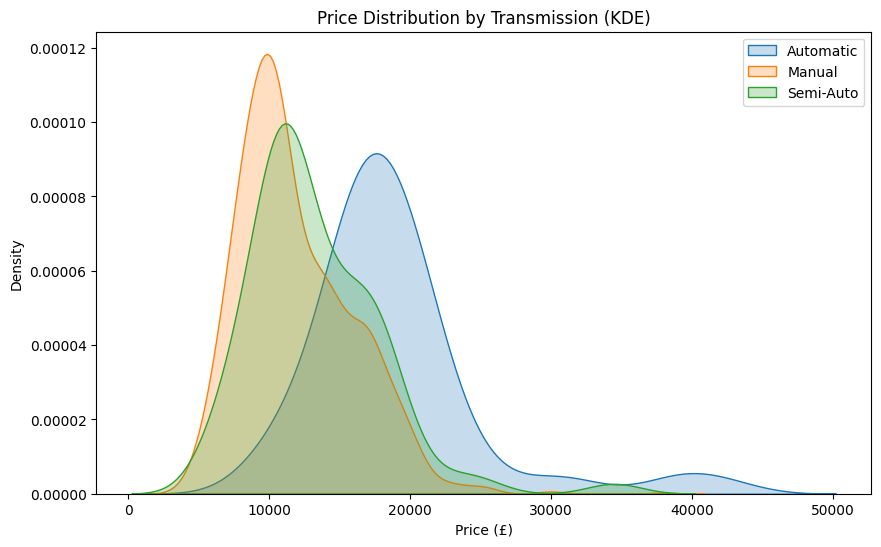

In [21]:
plt.figure(figsize=(10,6))
for trans in data['transmission'].unique():
    subset = data[data['transmission'] == trans]
    sns.kdeplot(subset['price'], label=trans, shade=True)
plt.title("Price Distribution by Transmission (KDE)")
plt.xlabel("Price (£)")
plt.ylabel("Density")
plt.legend()
plt.show()

### 2.9 Jointplot para Analisar Relações entre Variáveis Numéricas

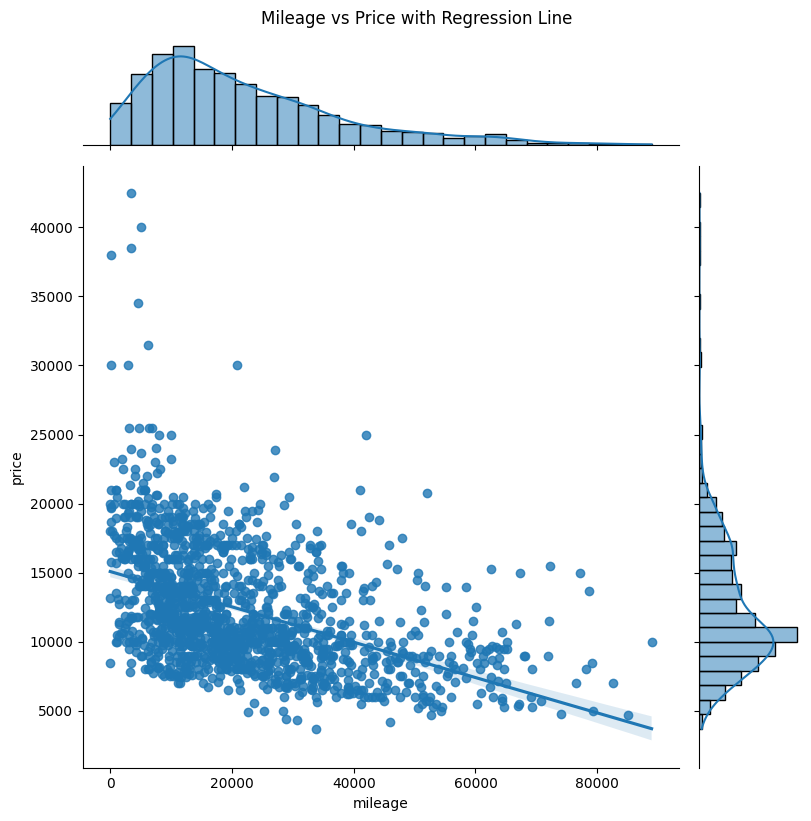

In [22]:
sns.jointplot(x='mileage', y='price', data=data, kind='reg', height=8)
plt.suptitle("Mileage vs Price with Regression Line", y=1.02)
plt.show()

### 2.11 Heatmap da Média de Preço por Combinação de Categorias

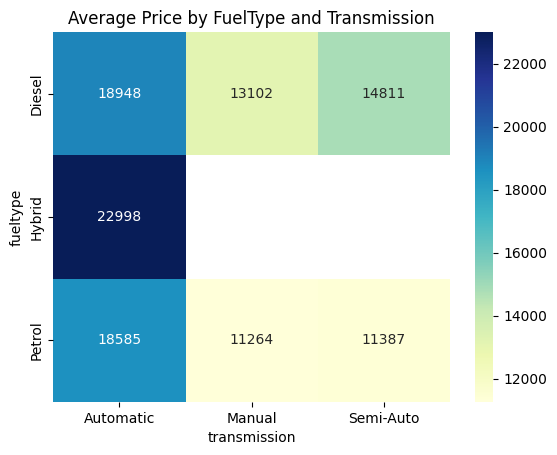

In [23]:
pivot_df = data.pivot_table(values='price', index='fueltype', columns='transmission', aggfunc='mean')
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title("Average Price by FuelType and Transmission")
plt.show()

### 2.11 Stripplot para Comparar Distribuições Categóricas

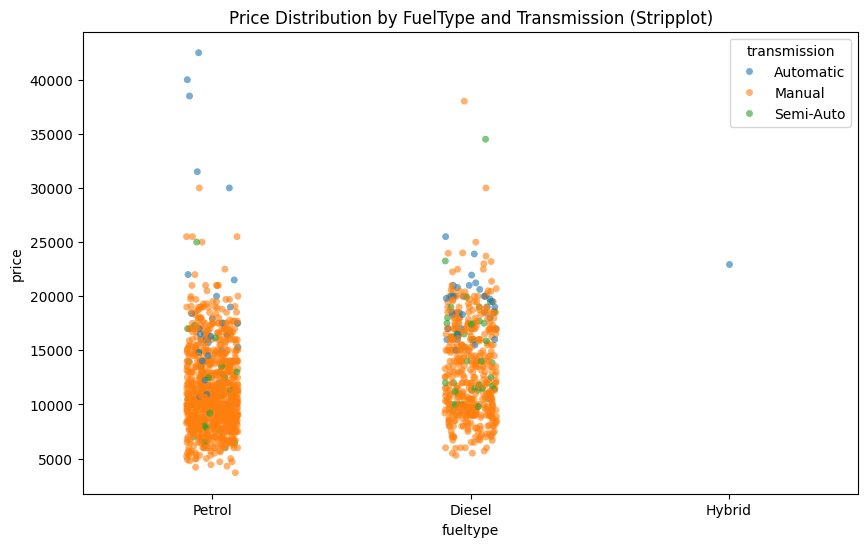

In [24]:
plt.figure(figsize=(10,6))
sns.stripplot(x='fueltype', y='price', hue='transmission', data=data, jitter=True, alpha=0.6)
plt.title("Price Distribution by FuelType and Transmission (Stripplot)")
plt.show()

### 2.12 Criar Faixas (Bins) de Mileage e Comparar Preços Médios

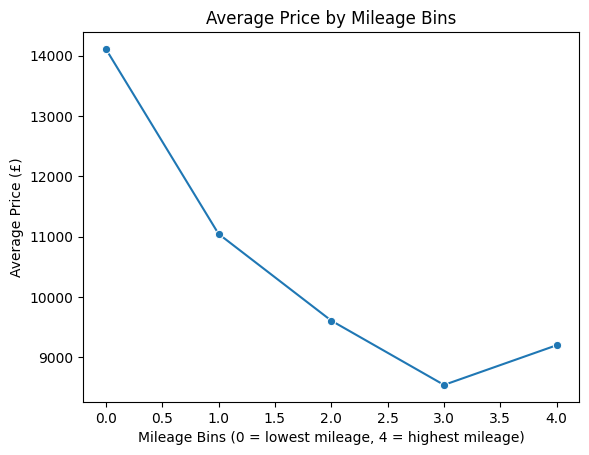

In [25]:
data['mileage_bin'] = pd.cut(data['mileage'], bins=5, labels=False)
avg_price_by_mileage_bin = data.groupby('mileage_bin')['price'].mean().reset_index()

sns.lineplot(x='mileage_bin', y='price', data=avg_price_by_mileage_bin, marker='o')
plt.title("Average Price by Mileage Bins")
plt.xlabel("Mileage Bins (0 = lowest mileage, 4 = highest mileage)")
plt.ylabel("Average Price (£)")
plt.show()

### 2.13 Jointplot com Hue (usando kde e subplots por categoria)

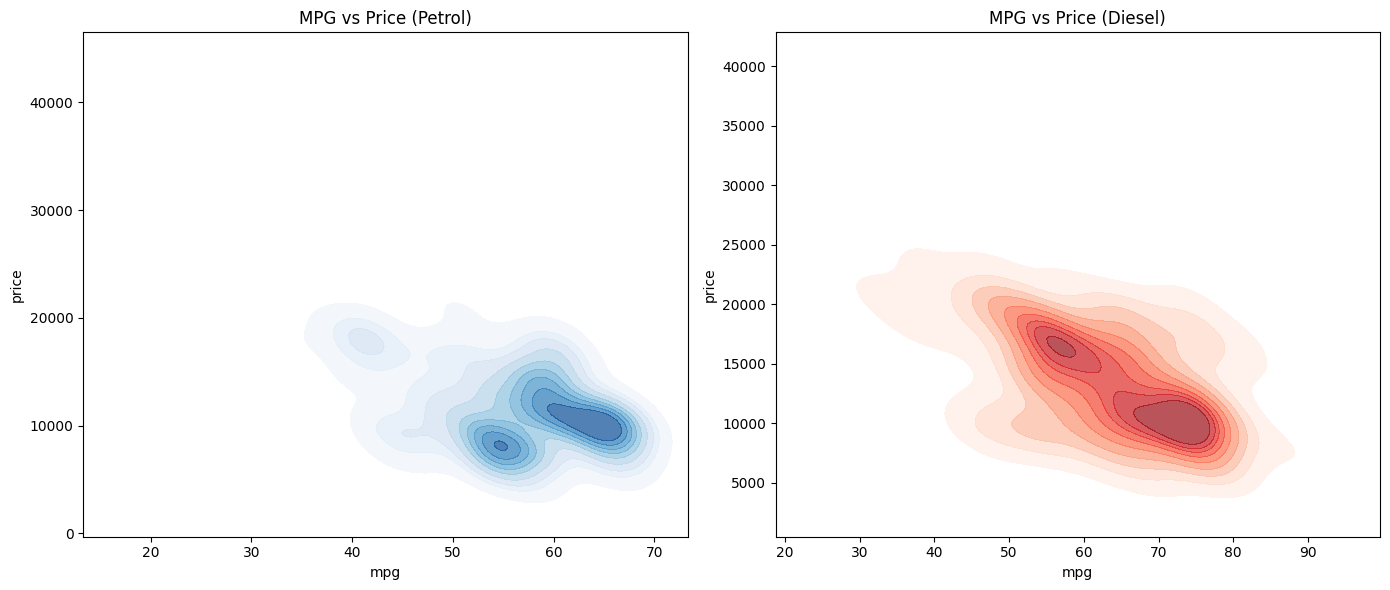

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.kdeplot(data=data[data['fueltype']=='Petrol'], x='mpg', y='price', fill=True, cmap="Blues", alpha=0.7, ax=axes[0])
axes[0].set_title("MPG vs Price (Petrol)")

sns.kdeplot(data=data[data['fueltype']=='Diesel'], x='mpg', y='price', fill=True, cmap="Reds", alpha=0.7, ax=axes[1])
axes[1].set_title("MPG vs Price (Diesel)")

plt.tight_layout()
plt.show()

### 2.14 Countplot Comparando Frequências

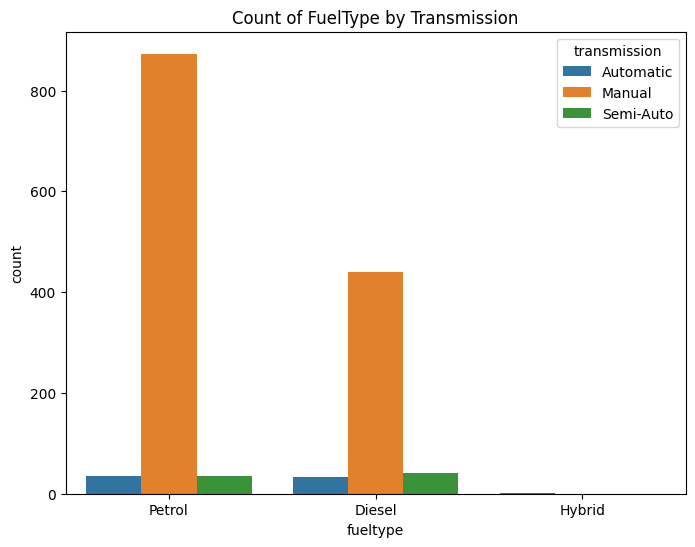

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='fueltype', hue='transmission', data=data)
plt.title("Count of FuelType by Transmission")
plt.show()

### 2.15 Cluster Map das Correlações entre Variáveis Numéricas

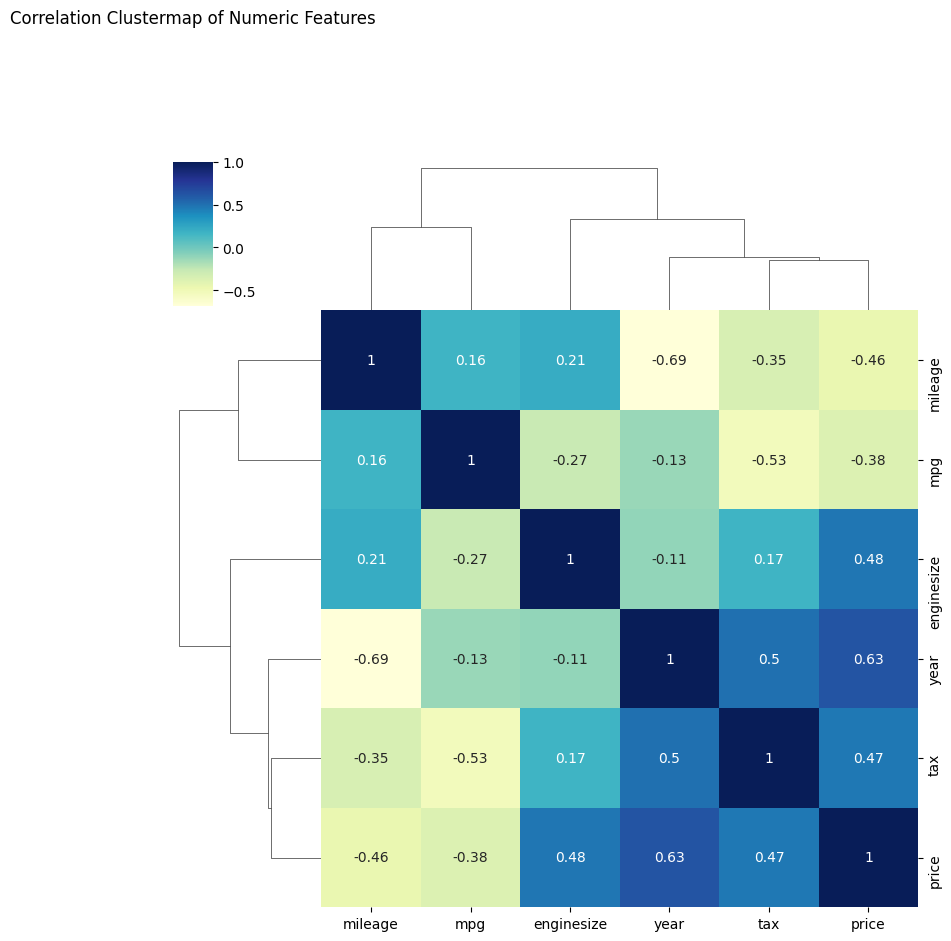

In [28]:
import seaborn as sns

corr = data[['year','mileage','tax','mpg','enginesize','price']].corr()
sns.clustermap(corr, annot=True, cmap='YlGnBu', figsize=(8,8))
plt.title("Correlation Clustermap of Numeric Features", pad=100)
plt.show()

### 2.16 Hexbin Plot (Mapa de Densidade 2D)

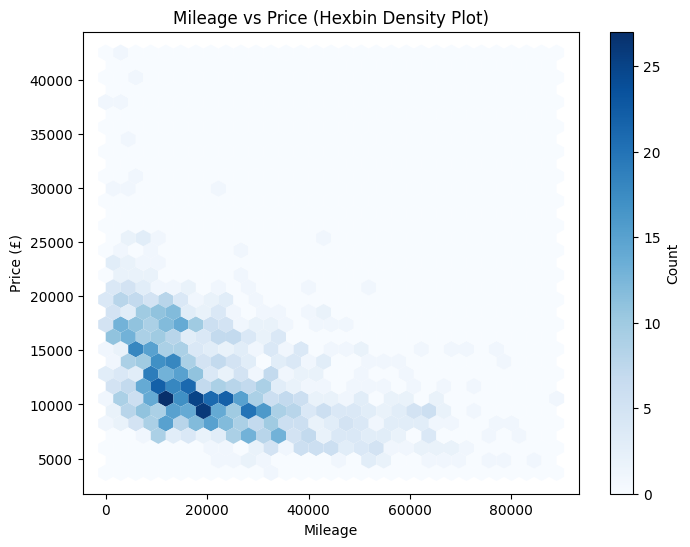

In [29]:
plt.figure(figsize=(8,6))
plt.hexbin(x=data['mileage'], y=data['price'], gridsize=30, cmap='Blues', edgecolors='none')
plt.colorbar(label='Count')
plt.xlabel("Mileage")
plt.ylabel("Price (£)")
plt.title("Mileage vs Price (Hexbin Density Plot)")
plt.show()

### 2.17 Heatmap de Correlações Condicionais (Subconjuntos)

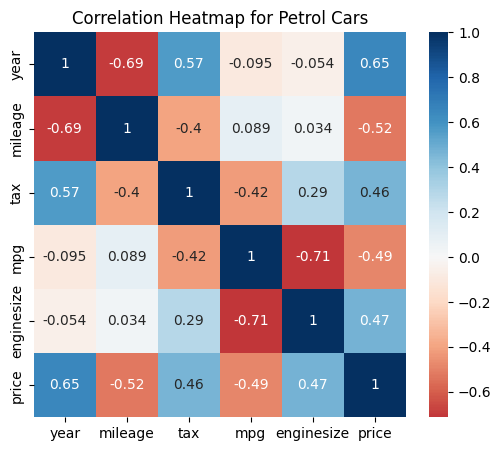

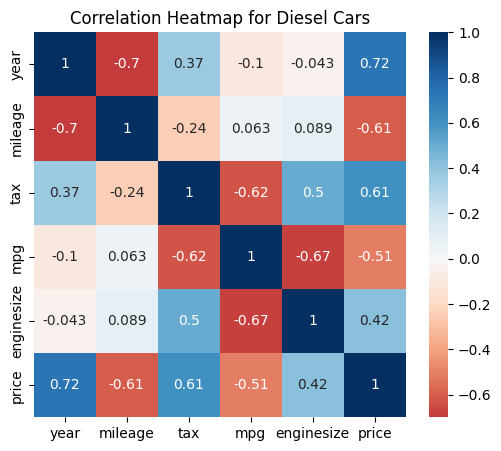

/home/codespace/.local/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


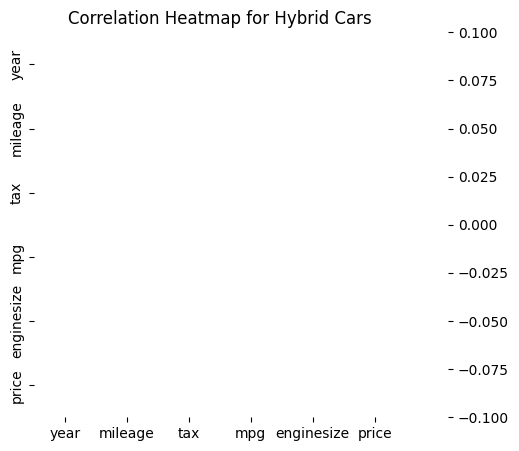

In [30]:
for ftype in data['fueltype'].unique():
    subset = data[data['fueltype'] == ftype]
    corr_subset = subset[['year','mileage','tax','mpg','enginesize','price']].corr()
    plt.figure(figsize=(6,5))
    sns.heatmap(corr_subset, annot=True, cmap='RdBu', center=0)
    plt.title(f"Correlation Heatmap for {ftype} Cars")
    plt.show()